<font color=blue> Привет еще раз. Спасибо, что доделала работу. Мои комментарии на этот раз выделены синим цветом.
    
---


---
## Комментарий от наставника

Привет! Спасибо, что прислала задание:) Поздравляю с первым сданным проектом. В целом, работа производит неплохое впечатление, однако обрати внимание на некоторые мои комментарии. Они обозначены пометкой **Комментарий от наставника**. Пострайся учесть эти комментарии.

---


## Исследование надёжности заёмщиков

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

---
## Комментарий от наставника


Правильно, что есть краткое вступление в работу, описание того, что надо делать. В работе необходимо приводить краткий план того, что надо сделать (если этот план имеется). Также название работы лучше отображать в отдельной ячейке и делать крупный шрифт (заголовок). Так работа выглядит презентабельно.

---

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import numpy as np


In [3]:
bank_customers = pd.read_csv('/datasets/data.csv')
# посмотрим какие значения встречаются в столбцах других
bank_customers

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,-4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791.862382,операции с жильем
21521,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999.806512,сделка с автомобилем
21522,1,-2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672.561153,недвижимость
21523,3,-3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093.050500,на покупку своего автомобиля


### Вывод

---
## Комментарий от наставника

При работе с данными считается, что 1 - это наличие признака, а 0 - его отсутствие. 

---

После использования двух функция - info и describe , видно что в файле есть ошибки и пропущенные данные. Расположим их по столбцам с описанием что будем делать по каждому столбцу чтобы в итоге получить таблицу пригодную для анализа.
База данных на 2\3 состоит из женщин. В основном у клиентов среднее образование. 


dob_years — возраст клиента в годах Проблема - возраст указан везде, но есть значения 101 клиент в 0 лет. Решение - надо их удалять, потому что аналитически не понять сколько этим людям лет.

education — уровень образования клиента. В начале 15 уникальных значений, есть проблемы с регистром. Решение - оставить 5 уникальных значений: начальное, среднее, неоконченное высшее, высшее, учёная степень.

education_id — идентификатор уровня образования Связан с образованием. Пока все данные есть, но надо удостовериться что связь верная, возможно придётся столбец переделать полностью, исходя из столбца education.

family_status — семейное положение. 5 уникальных. Все верно.

family_status_id — идентификатор семейного положения Привязан к статусу.

gender — пол клиента Проблема - выявлено 3 пола. Решение - найти и убрать лишний XNA - 1.

income_type — тип занятости Проблема - 8 уникальных типов данных. 4 из них представлены очень малым количеством людей - безработный, в декрете, предприниматель и студент. Решение - малые данные удаляем. Останется 4 : госслужащий, компаньон, пенсионер, сотрудник.

debt — имел ли задолженность по возврату кредитов Все данные есть. Уточнить легенду столбца у заказчика.

total_income — ежемесячный доход Не все данные есть по доходам клиентов. Их не хватает столько же, сколько нет данных по трудовым дням. Первая теория - быть может эти люди ещё не работали и не получали доход. Вторая теория - данные можно удалить (не подтвердилась)

purpose — цель получения кредита Проблема - 38 уникальных. Клиенты распределены между ними равномерно. Есть разнобой по наименованиям. Решение - нужно свести их к общим целям клиентов и сделать ещё один столбец идентификатор. Определить цели с помощью лематизации.

---
## Комментарий от наставника

У меня имеется пара комментариев по данному шагу:
- считывание данных и импорт необходимых библиотек лучше проводить в разных ячейках;
- таблицы на печать выводи без использования метода print();
- следует давать переменным осознанные имена. Таблица про клиентов - название надо бы выбрать соответствующее.

Здорово, что высказаны возможные причины появления пропусков в данных.

Первый взгляд на таблицу выполнен.

---

### Шаг 2. Предобработка данных

### Обработка пропусков

In [4]:
#исправили количество детей: -1 на 1 и 20 исправили на 2
bank_customers['children'] = bank_customers['children'].replace(-1, 1)
bank_customers['children'] = bank_customers['children'].replace(20, 2)
#print(bank_customers['children'].value_counts())

#даты рождения, удаляем 101 человека с датой в 0 лет.
bank_customers = bank_customers.loc[bank_customers['dob_years'] != 0]


#заменили регистр, получили 5 уникальных уровней образования.
bank_customers['education'] = bank_customers['education'].str.lower()



# удаляем безработный, в декрете, предприниматель и студент в столбце income_type
bank_customers = bank_customers.loc[(bank_customers['income_type'] != 'безработный') & (bank_customers['income_type'] != 'в декрете') 
                & (bank_customers['income_type'] != 'предприниматель') & (bank_customers['income_type'] != 'студент')] 

#  удаляем лишний пол в столбце gender
bank_customers = bank_customers.loc[bank_customers['gender'] != 'XNA']


#переводим стаж в положительное число
def module(a):
    if a <0:
        a = a*-1
    return a

bank_customers['days_employed'] = bank_customers['days_employed'].apply(module)

# Заполним пропуски в данных по стажу и зарплате. 
# Мы сформируем их из среднего значения - стажа и дохода таких же пользователей
#Для этого выделим в новую таблицу - четыре столбца - days_employed, total_income, income_type, gender.
# gender, мы добавили потому что женщины  в среднем получают и работают меньше мужчин. 
bank_customers['days_employed'] = bank_customers['days_employed'].fillna(0) 
bank_customers['total_income'] = bank_customers['total_income'].fillna(0) 
skip_clients = bank_customers.loc[:, ['days_employed', 'total_income', 'income_type', 'gender']]


def zarplata(row):
    income_type = row['income_type']
    gender = row['gender']
    total_income = row['total_income']
    viborka = skip_clients.loc[(skip_clients['income_type'] == income_type) & (skip_clients['gender'] == gender) & (skip_clients['total_income'] != 0)]
    zarplata = viborka['total_income'].mean()
    return zarplata

def stag(row):
    income_type = row['income_type']
    gender = row['gender']
    total_income = row['total_income']
    viborka = skip_clients.loc[(skip_clients['income_type'] == income_type) & (skip_clients['gender'] == gender) & (skip_clients['total_income'] != 0)]
    stag = viborka['days_employed'].mean()
    return stag
    
# Прогоним функцию по выборке столбца total_income и days_employed с нулевыми значениями.
#skip_clients.loc[skip_clients['total_income'] == 0, 'total_income'] = skip_clients.apply(zarplata, axis=1)
#skip_clients.loc[skip_clients['days_employed'] == 0, 'days_employed'] = skip_clients.apply(stag, axis=1)

#заменяем в общей таблице два столбца 
#bank_customers['total_income'] = skip_clients['total_income']
#bank_customers['days_employed'] = skip_clients['days_employed']
#display(bank_customers.head(15))


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


### Вывод

Пропущенных значений теперь нет. 21525 - строчек данных было изначально, 21417 - после предварительной чистки. Теперь меняем тип данных и решаем вопрос со столбцом - purpose, нам нужны понятные цели.

<font color=blue> Пропуски обработаны верно на этот раз. Здорово, что есть описание производимых действий.
    
---


---
## Комментарий от наставника

Здорово, что исправлены ошибки в данных.

---

### Замена типа данных

In [5]:
#мeняем отсутствующие значения в столбцах days_employed и total_income на 0. И переводим в int с помощью astype

bank_customers['days_employed'] = bank_customers['days_employed'].astype('int')
bank_customers['total_income'] = bank_customers['total_income'].astype('int')
print(bank_customers.info())



<class 'pandas.core.frame.DataFrame'>
Int64Index: 21417 entries, 0 to 21524
Data columns (total 12 columns):
children            21417 non-null int64
days_employed       21417 non-null int64
dob_years           21417 non-null int64
education           21417 non-null object
education_id        21417 non-null int64
family_status       21417 non-null object
family_status_id    21417 non-null int64
gender              21417 non-null object
income_type         21417 non-null object
debt                21417 non-null int64
total_income        21417 non-null int64
purpose             21417 non-null object
dtypes: int64(7), object(5)
memory usage: 2.1+ MB
None


### Вывод

Все данные полные и без float. Осталось избавиться от дубликатов.

---
## Комментарий от наставника

Да, это и есть пропуски в данных. Данные у нас по людям, получившим кредиты. Соответственно, они должны иметь доходы, как минимум. Попробуй использовать заполнение пропусков в соответствии с типом дохода. Тогда пенсионеры будут иметь такой же стаж, как и другие пенсионеры и т.д. А госслужащие будут получать также, как и другие госслужашие. 

---

---
## Комментарий от наставника

Исходя из общей информации о таблице мы видим, что два столбца имеют вещественный тип данных, который и надо заменить на целочисленный. Это замена произведена верно. Также хорошо бы освоить метод to_numeric() для будущих работ. 

---

### Обработка дубликатов

In [5]:
# Удаляем дубликаты
bank_customers.drop_duplicates(keep=False,inplace=True)                
                
print(bank_customers.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 21280 entries, 0 to 21524
Data columns (total 12 columns):
children            21280 non-null int64
days_employed       21280 non-null int64
dob_years           21280 non-null int64
education           21280 non-null object
education_id        21280 non-null int64
family_status       21280 non-null object
family_status_id    21280 non-null int64
gender              21280 non-null object
income_type         21280 non-null object
debt                21280 non-null int64
total_income        21280 non-null int64
purpose             21280 non-null object
dtypes: int64(7), object(5)
memory usage: 2.1+ MB
None


### Вывод

Итоговая база 21280, без дубликатов и 0 в данных.

---
## Комментарий от наставника

Дубликаты вызывают смещение финальных результатов, поэтому их и надо удалять. Конечно, в данных нет уникального идентификатора, однако надо уметь удалять дубликаты. Метод drop_duplicates() использован верно.

---

### Лемматизация

In [6]:
from pymystem3 import Mystem
m = Mystem()
bank_customers['purpose_lemma'] = bank_customers['purpose'].apply(lambda x: m.lemmatize(x))

# Предположим, что вид недвижимости может менять процент возврата. Допустим, что люди берущие кредит на коммерческую 
#недвижимость платят лучше, чем остальные. Проверим это на выборке тех,
#чьи цели в покупке коммерческой недвижимости мы можем идентифицировать


def lemm(stroka):
    for i in range(len(stroka)):
        if (stroka[i] == 'недвижимость') or (stroka[i] == 'жилье'):
            return 'недвижимость'
        if stroka[i] == 'коммерческий':
            return 'коммерческая недвижимость'
        if stroka[i] == 'автомобиль':
            return 'авто'
        if stroka[i] == 'свадьба':
            return 'свадьба'
        if stroka[i] == 'образование':
            return 'образование'

bank_customers['purpose_id'] = bank_customers['purpose_lemma'].apply(lemm)  
print(bank_customers['purpose_id'].value_counts())


недвижимость                 9430
авто                         4274
образование                  3986
свадьба                      2288
коммерческая недвижимость    1302
Name: purpose_id, dtype: int64


### Вывод

Провели лемматизацию целей клиентов. Получилось 5 направлений, из них больше всего клиентов интересует недвижимость - для личных нужд и коммерческая.

---
## Комментарий от наставника

Все верно, метод lemmatize() использован правильно. Хорошо бы на данном этапе подробно объяснить выбор лемм.

---

### Категоризация данных

In [7]:
# Нам нужны категории в доходах.Будем использовать percentile
# Используем Распределение общего объема денежных доходов населения в целом по России
#https://gks.ru/free_doc/new_site/population/bednost/tabl/tab-bed1-2-4.htm
#Распределение общего объема денежных доходов населения, в процентах от меньшего к большему - 5,3; 10; 15; 22,6; 47,1
# создаем функцию, которая с помощью перцентиль будет распределять столбец total_income на 6 групп.


# Создадим функцию которая распределяет клиентов исходя из их дохода по групаам.
def dohod(stroka):
    per1 = np.percentile(bank_customers['total_income'], 5.3)
    per2 = np.percentile(bank_customers['total_income'], 10)
    per3 = np.percentile(bank_customers['total_income'], 15)
    per4 = np.percentile(bank_customers['total_income'], 22.6)
    per5 = np.percentile(bank_customers['total_income'], 47.1)
    if stroka < per1:
        return '1 - группа'
    if per1 < stroka < per2:
        return '2 - группа'
    if per2 < stroka < per3:
        return '3 - группа'
    if per3 < stroka < per4:
        return '4 - группа'
    if per4 < stroka < per5:
        return '5 - группа'
    else:
        return '6 - группа'

bank_customers['dohod_id'] = bank_customers['total_income'].apply(dohod)   

# Сделаем группировку по кредитам с задолженностью исходя из стажа и пола клиента.Создаем сводную таблицу. 

def stag_id(row):
    type = row['income_type']
    stag = row['days_employed']
    if type == 'пенсионер':
        return '5 - на пенсии'
    if type != 'пенсионер':
        if 1200 <= stag < 12220:
            return '4 - более 5 лет'
        elif stag > 12200:  # 47 рабочих лет по 260 дней
            return '5 - на пенсии'
        elif stag == 0:
            return '0 - нет стажа'
        elif 1 <= stag < 260:
            return '1 - от 0 до 1 года'
        elif 260 <= stag < 780:
            return '2 - от 1 до 3 года'
        elif 780 <= stag < 1200:
            return '3 - от 3 до 5 лет'


bank_customers['stag_id'] = bank_customers.apply(stag_id, axis=1)


KeyboardInterrupt: 

### Вывод

Все данные подготовлены для анализа.

---
## Комментарий от наставника

Категоризовать также нужно и столбец с доходами. Это есть ниже, а должно быть в данном разделе, он для этого и нужен.

---

<font color=blue> Категоризвция по уровню дохода также сделана правильно. Здорово, что есть ссылка на источник информации. 
    
---


### Шаг 3. Ответьте на вопросы

- Есть ли зависимость между наличием детей и возвратом кредита в срок?

Vernuli_kredit  Zadolgnost  Procent_%
gender children                                       
F      0                 8833.0       589.0   0.066682
       1                 2856.0       244.0   0.085434
       2                 1152.0       137.0   0.118924
       3                  178.0        17.0   0.095506
       4                   27.0         1.0   0.037037
       5                    7.0         NaN        NaN
M      0                 4073.0       469.0   0.115149
       1                 1531.0       197.0   0.128674
       2                  757.0        64.0   0.084544
       3                  123.0        10.0   0.081301
       4                   10.0         3.0   0.300000
       5                    2.0         NaN        NaN

gender  children
F       0           589
        1           244
        2           137
        3            17
        4             1
M       0           469
        1           197
        2            64
        3            10
        4             3
dtype: int64


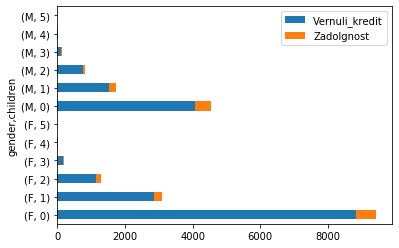

In [12]:
bank_customers['scet'] = 1
#Дети и возврат кредита
svodnaya_semia = pd.pivot_table(bank_customers, values='scet', index=['gender','children'],
                    columns=['debt'], aggfunc='sum')
svodnaya_semia.set_axis(['Vernuli_kredit', 'Zadolgnost'], axis = 'columns', inplace = True)
svodnaya_semia2 = svodnaya_semia.fillna(0).plot(kind = 'barh', stacked = True)
svodnaya_semia['Procent_%'] = svodnaya_semia['Zadolgnost'] / svodnaya_semia['Vernuli_kredit']
display(svodnaya_semia)
bank_customers1 = bank_customers[bank_customers['debt'] == 1]
print(bank_customers1.groupby(['gender','children']).size())

### Вывод

Зависимость есть. Данных для объективного исследования семей с детьми более 3-х мало. Но кредитная нагрузка меняется при наличии детей и количество невозвратов растёт на 2 процента в среднем. При этом мужчины без детей или с одним ребенком - оказываються в группе риска, а для женщин процент невозврата повышается при 2-3 детей в семье. 

---
## Комментарий от наставника

Вывод не противоречит полученным результатам. 

---

- Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [71]:
#Семейное положение и возврат кредита. Проверяем теорию, что выплата кредита зависит не сколько от семейного положения, сколько 
#от пола клиента
svodnaya_family = pd.pivot_table(bank_customers, values='scet', index=['gender','family_status'],
                    columns=['debt'], aggfunc='sum')
svodnaya_family.set_axis(['Vernuli_kredit', 'Zadolgnost'], axis = 'columns', inplace = True)
svodnaya_family['Procent_%'] = svodnaya_family['Zadolgnost'] / svodnaya_family['Vernuli_kredit']

display(svodnaya_family.sort_values(by = 'Procent_%', ascending = True))

Vernuli_kredit  Zadolgnost  Procent_%
gender family_status                                               
F      вдовец / вдова                    847          51   0.060213
       в разводе                         866          61   0.070439
       женат / замужем                  7166         526   0.073402
       Не женат / не замужем            1600         118   0.073750
       гражданский брак                 2574         232   0.090132
M      женат / замужем                  4157         399   0.095983
       в разводе                         234          24   0.102564
       гражданский брак                 1144         154   0.134615
       Не женат / не замужем             917         155   0.169029
       вдовец / вдова                     44          11   0.250000

### Вывод

Зависимость от семейного положения есть. Женщины серьёзнее относятся к своим обязательствам, но даже они, находясь в гражданских отношениях, не всегда вовремя возвращают долги. Самые ответственные из мужчин - находятся в официальном браке. Отсутствие отношений, а так же их не оформленность - сигнал к тому, что платить они будут не в срок.  

- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

---
## Комментарий от наставника

Выбросы из данных удалять не надо. Тем более 3 сигма - это для нормального распределения, а мы его не знаем. 

---

In [72]:
# Сделаем группировку по доходу и возвратам.
print('Выведем группы исходя из распределения доходов россиян')
print('1 - группа - до 5,3%; вторая - до 10%; третья - до 15%; четвертая -  22,6%; пятая - до 47,1%')
print()

svodnaya_dohod = pd.pivot_table(bank_customers, values='scet', index = ['gender', 'dohod_id'],
                    columns=['debt'], aggfunc='sum')

svodnaya_dohod.set_axis(['Vernuli_kredit', 'Zadolgnost'], axis = 'columns', inplace = True)
svodnaya_dohod['Procent_%'] = svodnaya_dohod['Zadolgnost'] / svodnaya_dohod['Vernuli_kredit']
display(svodnaya_dohod.sort_values(by = 'Procent_%', ascending = True))


Выведем группы исходя из распределения доходов россиян
1 - группа - до 5,3%; вторая - до 10%; третья - до 15%; четвертая -  22,6%; пятая - до 47,1%



Vernuli_kredit  Zadolgnost  Procent_%
gender dohod_id                                         
F      1 - группа             898          58   0.064588
       6 - группа            6067         431   0.071040
       4 - группа            1125          81   0.072000
       2 - группа             747          56   0.074967
       3 - группа             774          66   0.085271
       5 - группа            3442         296   0.085997
M      6 - группа            4291         468   0.109065
       1 - группа             154          18   0.116883
       5 - группа            1319         156   0.118271
       3 - группа             200          24   0.120000
       2 - группа             174          23   0.132184
       4 - группа             358          54   0.150838

### Вывод

Зависимость от дохода есть. Даже с небольшой зарплатой женщины платят в срок, но при повышении заработной платы - растёт и процент невозврата. У мужчин наоборот - после 250 тысяч их возможность платить вовремя повышается.

---
## Комментарий от наставника

Исходя из каких предположения выбран именно такой способ категоризации? При нем появляется дисбаланс классов. Лучше использовать разбиение по квантилям данных. Или же можно узнать в интернете процентный состав общества по доходам и затем уже категоризовать столбец с доходами по найденному соотношению с помощью персентилей. 

---

- Как разные цели кредита влияют на его возврат в срок?

In [73]:

# Сделаем группировку по целям и возвратам.

svodnaya_cel = pd.pivot_table(bank_customers, values='scet', index = ['gender','purpose_id'],
                    columns=['debt'], aggfunc='sum')

svodnaya_cel.set_axis(['Vernuli_kredit', 'Zadolgnost'], axis = 'columns', inplace = True)
svodnaya_cel['Procent_%'] = svodnaya_cel['Zadolgnost'] / svodnaya_cel['Vernuli_kredit'] 
display(svodnaya_cel.sort_values(by = 'Procent_%', ascending = True))

print('-----------------------------------------------------------------------------------')
print('!!! Дополнительно рассмотрим вопрос зависимости возврата от стажа и пола клиента.')


bank_customers_F = bank_customers[bank_customers['gender'] == 'F']
bank_customers_M = bank_customers[bank_customers['gender'] == 'M']
svodnaya = pd.pivot_table(bank_customers_F, values='scet', index=['gender', 'stag_id'],
                    columns=['debt'], aggfunc='sum')

svodnaya.set_axis(['Vernuli_kredit', 'Zadolgnost'], axis = 'columns', inplace = True)
svodnaya['Procent_%'] = svodnaya['Zadolgnost'] / svodnaya['Vernuli_kredit'] 
display(svodnaya.sort_values(by = 'stag_id', ascending = True))


svodnaya_M = pd.pivot_table(bank_customers_M, values='scet', index=['gender', 'stag_id'],
                    columns=['debt'], aggfunc='sum')
svodnaya_M.set_axis(['Vernuli_kredit', 'Zadolgnost'], axis = 'columns', inplace = True)
svodnaya_M['Procent_%'] = svodnaya_M['Zadolgnost'] / svodnaya_M['Vernuli_kredit']
display(svodnaya_M.sort_values(by = 'stag_id', ascending = True))


Vernuli_kredit  Zadolgnost  Procent_%
gender purpose_id                                                      
F      недвижимость                         5784         384   0.066390
       коммерческая недвижимость             806          59   0.073201
       свадьба                              1425         107   0.075088
       образование                          2437         207   0.084941
       авто                                 2601         231   0.088812
M      недвижимость                         2967         295   0.099427
       коммерческая недвижимость             397          40   0.100756
       свадьба                               679          77   0.113402
       авто                                 1274         168   0.131868
       образование                          1179         163   0.138253

-----------------------------------------------------------------------------------
!!! Дополнительно рассмотрим вопрос зависимости возврата от стажа и пола клиента.


Vernuli_kredit  Zadolgnost  Procent_%
gender stag_id                                                  
F      1 - от 0 до 1 года             638          72   0.112853
       2 - от 1 до 3 года            1533         167   0.108937
       3 - от 3 до 5 лет             1122          88   0.078431
       4 - более 5 лет               6775         496   0.073210
       5 - на пенсии                 2985         165   0.055276

Vernuli_kredit  Zadolgnost  Procent_%
gender stag_id                                                  
M      1 - от 0 до 1 года             429          58   0.135198
       2 - от 1 до 3 года            1036         156   0.150579
       3 - от 3 до 5 лет              760         122   0.160526
       4 - более 5 лет               3609         355   0.098365
       5 - на пенсии                  662          52   0.078550

### Вывод

Только выплата за недвижимость заставляет мужчин и женщин внимательнее относиться к кредитам. Свадьба, авто и образование у мужчин - не является залогом успешного возврата. 

Зависимость от стажа:
Пенсионеры платят лучше других категорий граждан. А отсутствие подтверждённого опыта не должно пугать при выдаче кредита. Стаж до 3-х лет, является определённым фактором риска. Причём как у женщин, так и у мужчин.


---
## Комментарий от наставника

Здорово, что при анализе использован метод сводных таблиц. Данный метод пригодится в дальнейших проектах. 

---

### Шаг 4. Общий вывод

Принадлежность к определённому полу гораздо больше оказывает влияние на возврат кредита, нежели какие либо другие факторы. Это видно из всех исследований, которые мы провели. Официальные отношения и большая семья, а так же большой стаж работы приносит в жизнь мужчины ответственность - при которой справляться с долгами легче.  
Женщины испытываю трудности с оплатой кредита при небольшом сроке работы, состоящие в гражданских отношениях и имеющие 2-3 детей.


---
## Комментарий от наставника

Выводы описаны кратко, но грамотно. Приведены ответы на главные вопросы проекта. В выводах можно приводить полученные ранее значения. Также можно расписать все, что было сделано в работе. 

---

<font color=blue> Помарки исправлены, и теперь работа выполнена хорошо. Успехов в дальнейших проектах :)
    
---

## Комментарий от наставника

- Таблицы на печать выводы с помощью метода display;
- Используй альтернативный способ обработки пропусков;
- Категоризацию по доходу стоит делать иначе. Смотри данный раздел подробнее.

Ты проделала большую работу, молодец! Исправь отмеченные тут замечания, и получится очень достойная работа :)

-----

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл;
- [x]  файл изучен;
- [x]  определены пропущенные значения;
- [x]  заполнены пропущенные значения;
- [x]  есть пояснение, какие пропущенные значения обнаружены;
- [x]  описаны возможные причины появления пропусков в данных;
- [x]  объяснено, по какому принципу заполнены пропуски;
- [x]  заменен вещественный тип данных на целочисленный;
- [x]  есть пояснение, какой метод используется для изменения типа данных и почему;
- [x]  удалены дубликаты;
- [x]  есть пояснение, какой метод используется для поиска и удаления дубликатов;
- [x]  описаны возможные причины появления дубликатов в данных;
- [x]  выделены леммы в значениях столбца с целями получения кредита;
- [x]  описан процесс лемматизации;
- [x]  данные категоризированы;
- [x]  есть объяснение принципа категоризации данных;
- [x]  есть ответ на вопрос: "Есть ли зависимость между наличием детей и возвратом кредита в срок?";
- [x]  есть ответ на вопрос: "Есть ли зависимость между семейным положением и возвратом кредита в срок?";
- [x]  есть ответ на вопрос: "Есть ли зависимость между уровнем дохода и возвратом кредита в срок?";
- [x]  есть ответ на вопрос: "Как разные цели кредита влияют на его возврат в срок?";
- [x]  в каждом этапе есть выводы;
- [x]  есть общий вывод.